# Prestige Linear Regression

In [2]:
library(carData)
library(dplyr)
data <- carData::Prestige
head(data)

                    education income women prestige census type
gov.administrators      13.11  12351 11.16     68.8   1113 prof
general.managers        12.26  25879  4.02     69.1   1130 prof
accountants             12.77   9271 15.70     63.4   1171 prof
purchasing.officers     11.42   8865  9.11     56.8   1175 prof
chemists                14.62   8403 11.68     73.5   2111 prof
physicists              15.64  11030  5.13     77.6   2113 prof

In [2]:
str(data)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
model1 <- lm(prestige ~ income, data = data)
summary(model1)


Call:
lm(formula = prestige ~ income, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.007  -8.378  -2.378   8.432  32.084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.714e+01  2.268e+00   11.97   <2e-16 ***
income      2.897e-03  2.833e-04   10.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.09 on 100 degrees of freedom
Multiple R-squared:  0.5111,	Adjusted R-squared:  0.5062 
F-statistic: 104.5 on 1 and 100 DF,  p-value: < 2.2e-16


In [5]:
suppressMessages(library(modelr))
metrics = data.frame(
  Title = "inc",
  R2 = rsquare(model1, data = data),
  MSE = mse(model1, data = data),
  RMSE = rmse(model1, data = data),
  MAE = mae(model1, data = data),
  MAPE = mape(model1, data = data)
)
metrics

  Title        R2      MSE     RMSE     MAE      MAPE
1   inc 0.5110901 143.2958 11.97062 9.64557 0.2382211

In [ ]:
model1$coefficients
# prestige = 2.714e+01 + 2.897e-03*income

 (Intercept)       income 
27.141176368  0.002896799 

In [7]:
model2 = lm(prestige ~ income + education, data = data)
summary(model2)


Call:
lm(formula = prestige ~ income + education, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
income       0.0013612  0.0002242   6.071 2.36e-08 ***
education    4.1374444  0.3489120  11.858  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


In [8]:
metrics <- metrics |> bind_rows(data.frame(
  Title = "edu+inc",
  R2 = rsquare(model2, data = data),
  MSE = mse(model2, data = data),
  RMSE = rmse(model2, data = data),
  MAE = mae(model2, data = data),
  MAPE = mape(model2, data = data)
))
metrics

    Title        R2       MSE      RMSE      MAE      MAPE
1     inc 0.5110901 143.29578 11.970622 9.645570 0.2382211
2 edu+inc 0.7980008  59.20442  7.694441 6.188191 0.1632151

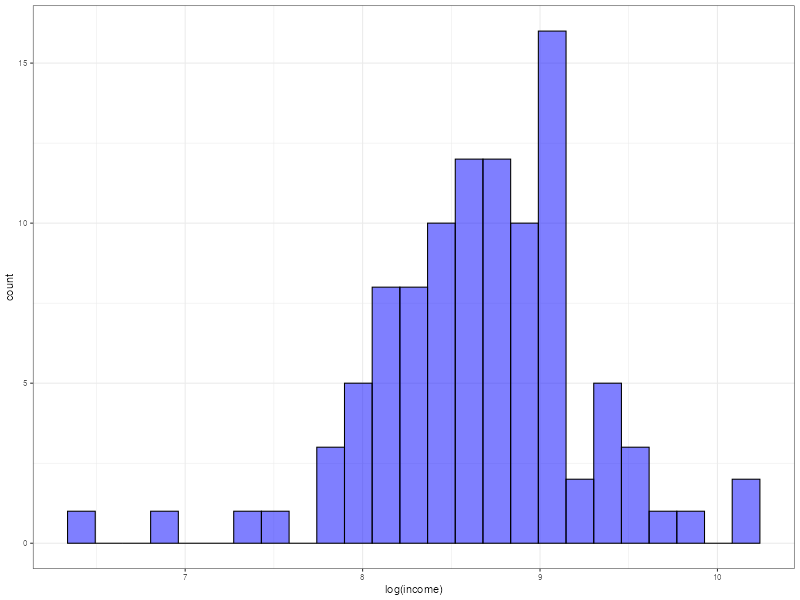

In [11]:
library(ggplot2)
ggplot(data, aes(log(income))) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

In [12]:
model3 = lm(prestige ~ log(income) + education, data = data)
summary(model3)


Call:
lm(formula = prestige ~ log(income) + education, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0346  -4.5657  -0.1857   4.0577  18.1270 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -95.1940    10.9979  -8.656 9.27e-14 ***
log(income)  11.4375     1.4371   7.959 2.94e-12 ***
education     4.0020     0.3115  12.846  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.145 on 99 degrees of freedom
Multiple R-squared:  0.831,	Adjusted R-squared:  0.8275 
F-statistic: 243.3 on 2 and 99 DF,  p-value: < 2.2e-16


In [13]:
metrics <- metrics |> bind_rows(data.frame(
  Title = "edu+log(inc)",
  R2 = rsquare(model3, data = data),
  MSE = mse(model3, data = data),
  RMSE = rmse(model3, data = data),
  MAE = mae(model3, data = data),
  MAPE = mape(model3, data = data)
))
metrics

         Title        R2       MSE      RMSE      MAE      MAPE
1          inc 0.5110901 143.29578 11.970622 9.645570 0.2382211
2      edu+inc 0.7980008  59.20442  7.694441 6.188191 0.1632151
3 edu+log(inc) 0.8309561  49.54548  7.038855 5.625993 0.1448329

In [ ]:
data$type #factor

  [1] prof prof prof prof prof prof prof prof prof prof prof prof prof prof prof
 [16] prof prof prof prof prof prof prof prof prof prof prof prof bc   prof prof
 [31] wc   prof wc   <NA> wc   wc   wc   wc   wc   wc   wc   wc   wc   wc   wc  
 [46] wc   wc   wc   wc   wc   wc   wc   <NA> bc   wc   wc   wc   bc   bc   bc  
 [61] bc   bc   <NA> bc   bc   bc   <NA> bc   bc   bc   bc   bc   bc   bc   bc  
 [76] bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc   bc  
 [91] bc   bc   bc   bc   bc   prof bc   bc   bc   bc   bc   bc  
Levels: bc prof wc

In [15]:
model4 = lm(prestige ~ log(income) + education + type, data = data)
summary(model4)


Call:
lm(formula = prestige ~ log(income) + education + type, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.511  -3.746   1.011   4.356  18.438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -81.2019    13.7431  -5.909 5.63e-08 ***
log(income)  10.4875     1.7167   6.109 2.31e-08 ***
education     3.2845     0.6081   5.401 5.06e-07 ***
typeprof      6.7509     3.6185   1.866   0.0652 .  
typewc       -1.4394     2.3780  -0.605   0.5465    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.637 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8555,	Adjusted R-squared:  0.8493 
F-statistic: 137.6 on 4 and 93 DF,  p-value: < 2.2e-16


In [16]:
metrics <- metrics |> bind_rows(data.frame(
  Title = "edu+log(inc)+type",
  R2 = rsquare(model4, data = data),
  MSE = mse(model4, data = data),
  RMSE = rmse(model4, data = data),
  MAE = mae(model4, data = data),
  MAPE = mape(model4, data = data)
))
metrics

              Title        R2       MSE      RMSE      MAE      MAPE
1               inc 0.5110901 143.29578 11.970622 9.645570 0.2382211
2           edu+inc 0.7980008  59.20442  7.694441 6.188191 0.1632151
3      edu+log(inc) 0.8309561  49.54548  7.038855 5.625993 0.1448329
4 edu+log(inc)+type 0.8573292  41.79883  6.465202 5.189850 0.1299505

In [18]:
model5 = lm(prestige ~ log(income) + education + type + women, data = data)
summary(model5)


Call:
lm(formula = prestige ~ log(income) + education + type + women, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8762  -4.0579   0.5503   4.2129  16.6400 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -115.67219   18.80181  -6.152 1.96e-08 ***
log(income)   14.65518    2.31151   6.340 8.42e-09 ***
education      2.97384    0.60205   4.940 3.49e-06 ***
typeprof       5.29186    3.55585   1.488   0.1401    
typewc        -3.21599    2.40654  -1.336   0.1847    
women          0.08382    0.03223   2.601   0.0108 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.44 on 92 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8654,	Adjusted R-squared:  0.8581 
F-statistic: 118.3 on 5 and 92 DF,  p-value: < 2.2e-16


In [19]:
metrics <- metrics |> bind_rows(data.frame(
  Title = "edu+log(inc)+type+women",
  R2 = rsquare(model5, data = data),
  MSE = mse(model5, data = data),
  RMSE = rmse(model5, data = data),
  MAE = mae(model5, data = data),
  MAPE = mape(model5, data = data)
))
metrics

                    Title        R2       MSE      RMSE      MAE      MAPE
1                     inc 0.5110901 143.29578 11.970622 9.645570 0.2382211
2                 edu+inc 0.7980008  59.20442  7.694441 6.188191 0.1632151
3            edu+log(inc) 0.8309561  49.54548  7.038855 5.625993 0.1448329
4       edu+log(inc)+type 0.8573292  41.79883  6.465202 5.189850 0.1299505
5 edu+log(inc)+type+women 0.8671005  38.93609  6.239879 4.921183 0.1186606

In [21]:
summary(lm(income~education, data = data))


Call:
lm(formula = income ~ education, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5493.2 -2433.8   -41.9  1491.5 17713.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2853.6     1407.0  -2.028   0.0452 *  
education      898.8      127.0   7.075 2.08e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3483 on 100 degrees of freedom
Multiple R-squared:  0.3336,	Adjusted R-squared:  0.3269 
F-statistic: 50.06 on 1 and 100 DF,  p-value: 2.079e-10


In [22]:
library(car)
vif(model5)

                GVIF Df GVIF^(1/(2*Df))
log(income) 3.400339  1        1.844001
education   6.405871  1        2.530982
type        6.801055  2        1.614894
women       2.392123  1        1.546649

In [22]:
model6 = lm(prestige ~ education + type + women, data = data)
summary(model6)


Call:
lm(formula = prestige ~ education + type + women, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0752  -5.0445   0.7207   5.5826  18.7587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.43988    5.73899  -0.077   0.9391    
education    4.43388    0.66321   6.685 1.68e-09 ***
typeprof     7.31595    4.22235   1.733   0.0865 .  
typewc      -3.13070    2.86916  -1.091   0.2780    
women       -0.05783    0.02769  -2.088   0.0395 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.678 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8066,	Adjusted R-squared:  0.7983 
F-statistic: 96.95 on 4 and 93 DF,  p-value: < 2.2e-16


In [23]:
metrics <- metrics |> bind_rows(data.frame(
  Title = "edu+type+women",
  R2 = rsquare(model6, data = data),
  MSE = mse(model6, data = data),
  RMSE = rmse(model6, data = data),
  MAE = mae(model6, data = data),
  MAPE = mape(model6, data = data)
))
metrics

                    Title        R2       MSE      RMSE      MAE      MAPE
1                     inc 0.5110901 143.29578 11.970622 9.645570 0.2382211
2                 edu+inc 0.7980008  59.20442  7.694441 6.188191 0.1632151
3            edu+log(inc) 0.8309561  49.54548  7.038855 5.625993 0.1448329
4       edu+log(inc)+type 0.8573292  41.79883  6.465202 5.189850 0.1299505
5 edu+log(inc)+type+women 0.8671005  38.93609  6.239879 4.921183 0.1186606
6          edu+type+women 0.8090340  55.94806  7.479844 5.943353 0.1560902

In [24]:
library(leaps)

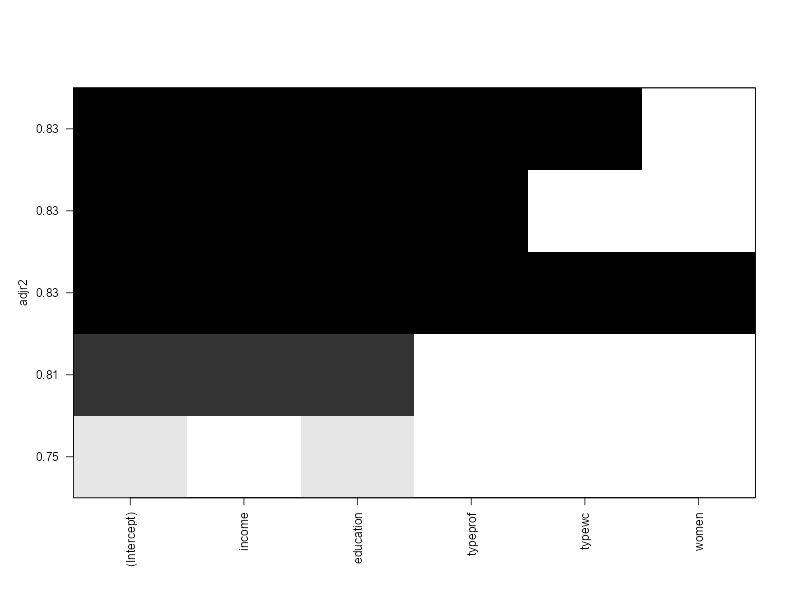

In [27]:
best_subsets_mod <- regsubsets(prestige ~ income + education + type + women, data = data)
plot(best_subsets_mod, scale = "adjr2")

In [28]:
results <- summary(best_subsets_mod)
round(results$adjr2, 4)

[1] 0.7482 0.8101 0.8274 0.8278 0.8260

## Step Wise

In [36]:
data$census <- NULL

data <- data[!is.na(data$type), ]

In [37]:
start_mod <- lm(prestige ~ 1, data = data)
summary(start_mod)


Call:
lm(formula = prestige ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.028 -11.953  -3.728  12.572  39.872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   47.328      1.727   27.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.09 on 97 degrees of freedom


In [38]:
end_mod <- lm(prestige ~ ., data = data)
summary(end_mod)


Call:
lm(formula = prestige ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7485  -4.4817   0.3119   5.2478  18.4978 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.8139032  5.3311558  -0.153 0.878994    
education    3.6623557  0.6458300   5.671 1.63e-07 ***
income       0.0010428  0.0002623   3.976 0.000139 ***
women        0.0064434  0.0303781   0.212 0.832494    
typeprof     5.9051970  3.9377001   1.500 0.137127    
typewc      -2.9170720  2.6653961  -1.094 0.276626    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.132 on 92 degrees of freedom
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.826 
F-statistic: 93.07 on 5 and 92 DF,  p-value: < 2.2e-16


In [39]:
stepwise_mod <- step(start_mod,                      
                     scope = list(lower = start_mod, upper = end_mod),        
                     direction = "both", trace = 1, steps = 1000)
                     # c("both", "backward", "forward") - possible directions

Start:  AIC=557.4
prestige ~ 1

            Df Sum of Sq     RSS    AIC
+ education  1   21282.5  7064.4 423.23
+ type       2   19775.6  8571.3 444.18
+ income     1   14021.6 14325.3 492.51
<none>                   28346.9 557.40
+ women      1     343.9 28003.0 558.20

Step:  AIC=423.23
prestige ~ education

            Df Sum of Sq     RSS    AIC
+ income     1    1792.0  5272.4 396.56
+ type       2    1324.4  5740.0 406.89
+ women      1     763.5  6300.9 414.02
<none>                    7064.4 423.23
- education  1   21282.5 28346.9 557.40

Step:  AIC=396.56
prestige ~ education + income

            Df Sum of Sq     RSS    AIC
+ type       2     591.2  4681.3 388.90
<none>                    5272.4 396.56
+ women      1      10.4  5262.1 398.36
- income     1    1792.0  7064.4 423.23
- education  1    9052.8 14325.3 492.51

Step:  AIC=388.9
prestige ~ education + income + type

            Df Sum of Sq    RSS    AIC
<none>                   4681.3 388.90
+ women      1      2.2

In [40]:
summary(stepwise_mod)


Call:
lm(formula = prestige ~ education + income + type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9529  -4.4486   0.1678   5.0566  18.6320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6229292  5.2275255  -0.119    0.905    
education    3.6731661  0.6405016   5.735 1.21e-07 ***
income       0.0010132  0.0002209   4.586 1.40e-05 ***
typeprof     6.0389707  3.8668551   1.562    0.122    
typewc      -2.7372307  2.5139324  -1.089    0.279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.095 on 93 degrees of freedom
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.8278 
F-statistic: 117.5 on 4 and 93 DF,  p-value: < 2.2e-16
